# # 그래프 가시화 정리

## - 데이터 가져오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv', index_col='PassengerId')
train['Age'].fillna(train['Age'].mean(), inplace=True)
train20 = train.head(20)
train20.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S


## - 라이브러리 설정

In [3]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["font.family"] = 'Malgun Gothic'

## - matplotlib으로 그리기

### 라인플롯

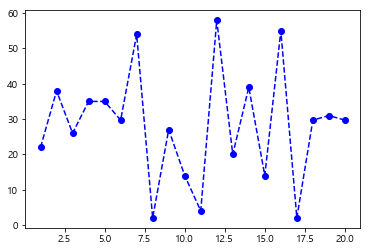

In [4]:
# x, y를 입력하여 그리기
plt.plot(train20.index, train20['Age'], 'bo--')

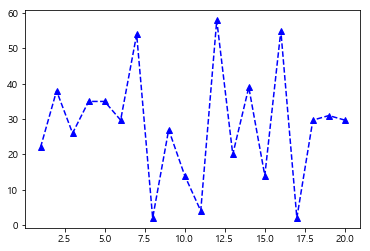

In [5]:
# x, y 대신에 Series(index 기준 value 값)로 그림
plt.plot(train20['Age'], 'b^--')

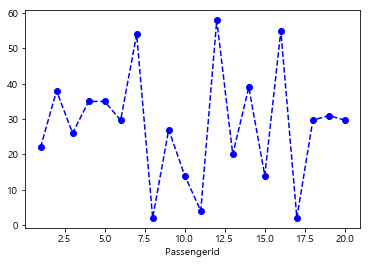

In [6]:
# Serise/DataFrame의 plot()
train20['Age'].plot(color='b', marker='o', linestyle='--')

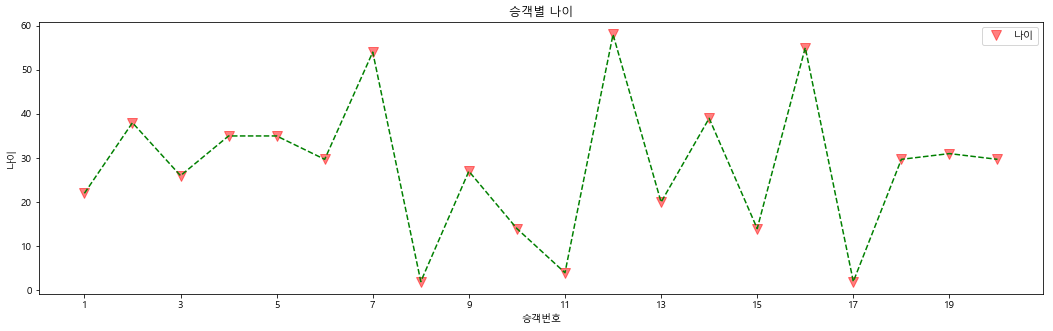

In [7]:
# plot 꾸미기
train20['Age'].plot(color='r', marker='v', markersize=10, linestyle='None', alpha=0.5, label='Age')
ax = train20['Age'].plot(color='g', linestyle='--', label='Age')

ax.figure.set_size_inches(18, 5)
ax.set_xticks(range(1,21, 2))
#ax.set_xticklabels(["one", "two", "three", "four", "five"], rotation=30, fontsize="small")
ax.set_xlabel('승객번호')
ax.set_ylabel('나이')
ax.set_title('승객별 나이')
ax.legend(['나이'], loc='best')

### 바플롯

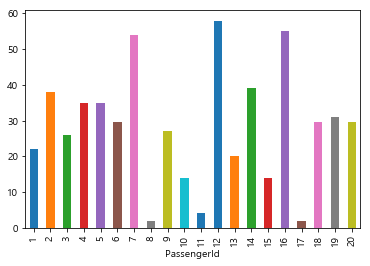

In [8]:
# kind=line/bar/barh
train20['Age'].plot(kind='bar')

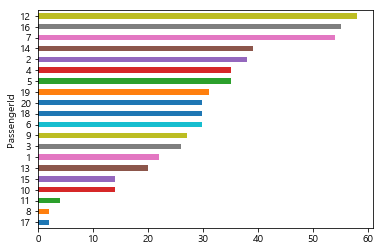

In [9]:
# 정렬과 barh
train20.sort_values(by='Age')['Age'].plot(kind='barh')

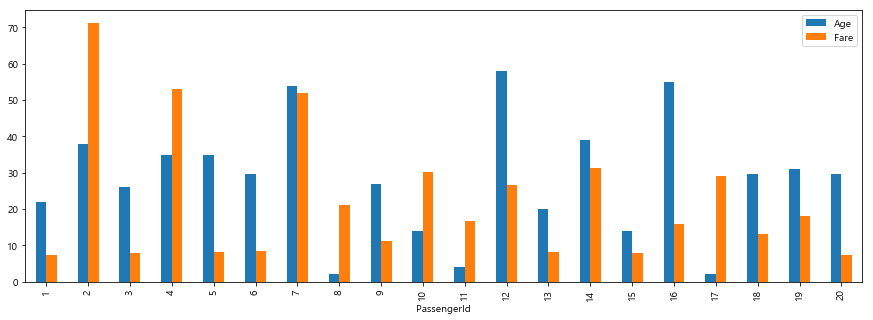

In [10]:
# kind=line, bar, barh
ax = train20[['Age', 'Fare']].plot.bar()
ax.figure.set_size_inches(15, 5)
ax.legend()

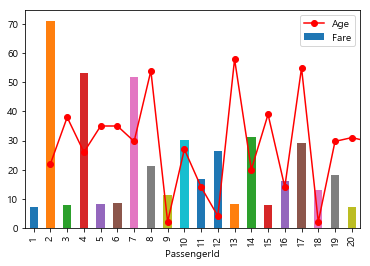

In [11]:
train20['Age'].plot(color='r', marker='o')
train20['Fare'].plot(kind='bar')
plt.legend()

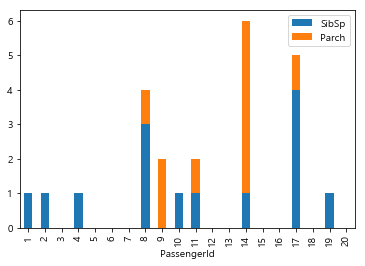

In [12]:
# stacked=True/False
train20[['SibSp', 'Parch']].plot(kind='bar', stacked=True)

### 히스토그램

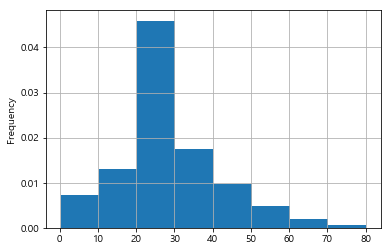

In [13]:
# 히스토그램(범위의 개수)
train['Age'].plot.hist(bins=8, grid=True, density=True)

### 산점도

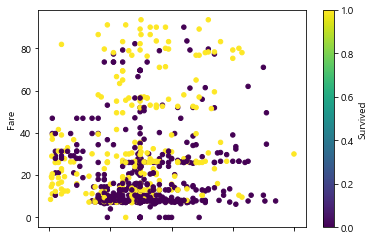

In [14]:
low_fare = train[train['Fare'] < 100]
low_fare.plot.scatter(x='Age', y='Fare', c='Survived', colormap='viridis')

## - seaborn으로 쉽게 그리기

In [15]:
import seaborn as sns

### countplot (빈도 그래프)

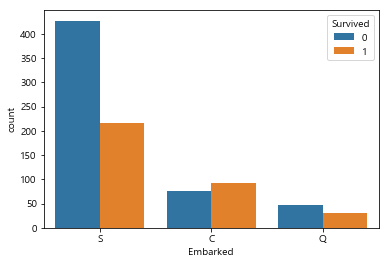

In [16]:
# 개수를 Y축으로 그래프 그림
sns.countplot(data=train, x='Embarked', hue='Survived')

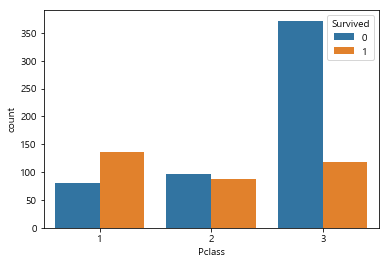

In [17]:
# 개수를 Y축으로 그래프 그림
sns.countplot(data=train, x='Pclass', hue='Survived')

value_count를 활용

In [18]:
s1=train.loc[train['Survived'] == 0, 'Pclass'].value_counts()
s2=train.loc[train['Survived'] == 1, 'Pclass'].value_counts()
print(s1)
print(s2)

3    372
2     97
1     80
Name: Pclass, dtype: int64
1    136
3    119
2     87
Name: Pclass, dtype: int64


In [19]:
df = pd.concat([s1, s2], axis=1)
df.columns.name = 'Survived'
df.columns = ['0', '1']
df

,0,1
1,80,136
2,97,87
3,372,119


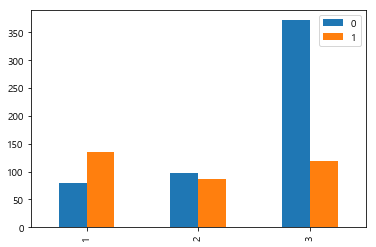

In [20]:
df.plot(kind='bar')

pivot을 활용

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


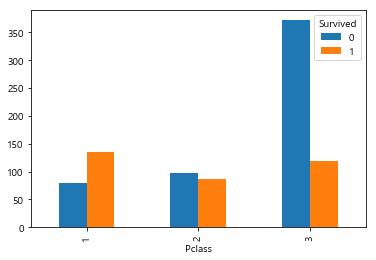

In [21]:
df = pd.pivot_table(train, index='Pclass', columns='Survived', values='Name', aggfunc=len)
df.plot(kind='bar')
df

### barplot, pointplot (평균 그래프)

C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


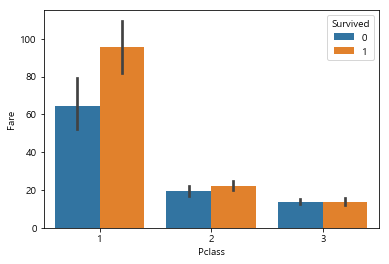

In [22]:
# y의 평균값과 분산을 그래프로 그림
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')

C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


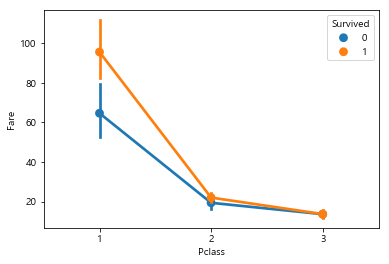

In [23]:
# barplt과 동일함
sns.pointplot(data=train, x='Pclass', y='Fare', hue='Survived')

pivot을 활용하여 표시

In [24]:
df = train.pivot_table(index='Pclass', columns='Survived', values='Fare', aggfunc=[np.average])
df

average           
Survived          0          1
Pclass                        
1         64.684008  95.608029
2         19.412328  22.055700
3         13.669364  13.694887

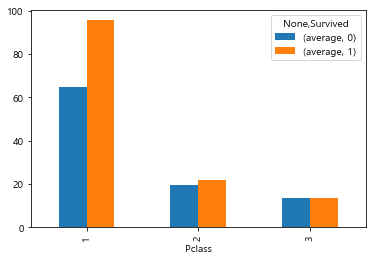

In [25]:
df.plot(kind='bar')

### distplot(분산, 챠트)

C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


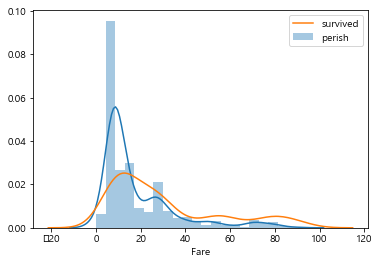

In [26]:
# 분산 챠트
low_fare = train[train['Fare'] < 100]

perish = low_fare[low_fare['Survived'] == 0]
survived = low_fare[low_fare['Survived'] == 1]

sns.distplot(perish['Fare'], hist=True, label='perish')
sns.distplot(survived['Fare'], hist=False, label='survived')

### lmplot (선점형, 산포 그래프)

C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


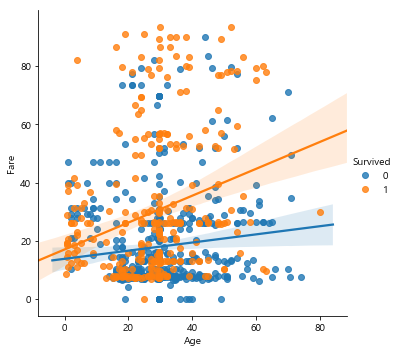

In [27]:
low_fare = train[train['Fare'] < 100]

sns.lmplot(data=low_fare, x='Age', y='Fare', hue='Survived', fit_reg=True)

## - 복합챠트 그리기

In [28]:
import matplotlib.pyplot as plt

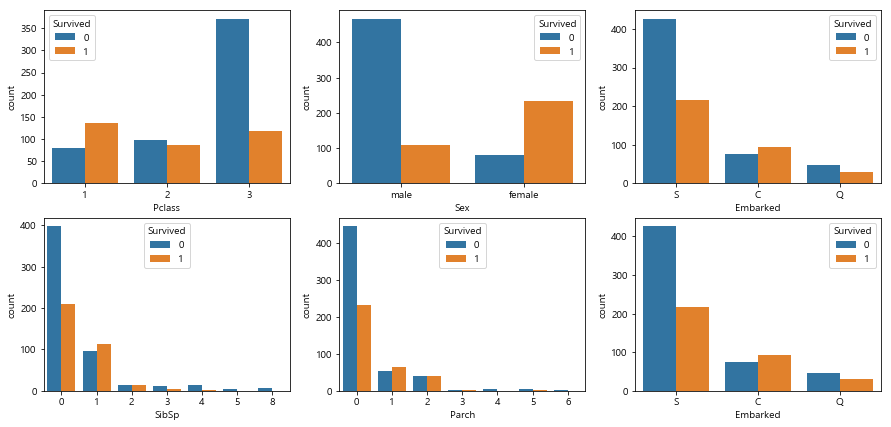

In [29]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(15, 7)

sns.countplot(data=train, x='Pclass', hue='Survived', ax=ax1)
sns.countplot(data=train, x='Sex', hue='Survived', ax=ax2)
sns.countplot(data=train, x='Embarked', hue='Survived', ax=ax3)
sns.countplot(data=train, x='SibSp', hue='Survived', ax=ax4)
sns.countplot(data=train, x='Parch', hue='Survived', ax=ax5)
sns.countplot(data=train, x='Embarked', hue='Survived', ax=ax6)